In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets
from IPython.display import Image

### Reto IRIS

- Carga el dataset de iris dataset

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- Analiza los datos, de la misma forma que hicimos ayer, y escoge unicamente las features mas relevantes (esta en la descripcion del dataset)

In [3]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Mature_flower_diagram.svg/1200px-Mature_flower_diagram.svg.png', width=500)

Attributes: 4 numeric   - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n

Usaremos la informacion de los petalos, ultimas dos columnas

In [4]:
inputs = iris['data'][:,-2:]
outputs = iris['target']

In [5]:
inputs.shape

(150, 2)

In [6]:
outputs.shape

(150,)

- Haz un split entre train y test de los datos


In [7]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.20)

- Escoge 5 modelos diferentes para resolver este tipo de problema y una metrica para evaluarlos
- Entrena los modelos y muestra un resumen de los resultado que incluya: nombre del modelo, metrica en train y metrica en test

In [8]:
#Arbol clasificador de decision

clf = DecisionTreeClassifier(random_state=0)

#Entrenamos:
clf.fit(inputs_train, outputs_train, sample_weight=None, check_input=True)

#Metrica: F1: harmonic mean of the precision and recall
outputs_test_pred = clf.predict(inputs_test)
outputs_train_pred = clf.predict(inputs_train)

from sklearn.metrics import f1_score

metrica_train = f1_score(outputs_train, outputs_train_pred, average='micro')
metrica_test = f1_score(outputs_test, outputs_test_pred, average='micro')

#Average micro = Calculate metrics globally by counting the total true positives, false negatives and false positives.

print(f'Train: {metrica_train}\nTest: {metrica_test}')

Train: 0.9916666666666667
Test: 0.9333333333333333


In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

#Arbol clasificador de decision - extra (splits aleatorios para cada maximo de features- se elige el mejor split)     https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier

extra_tree = ExtraTreeClassifier(random_state=0)
####cls = BaggingClassifier(extra_tree, random_state=0).fit(inputs_train, outputs_train)

#Entrenamos:
extra_tree.fit(inputs_train, outputs_train)

#Metrica: Matriz de confusion
outputs_test_pred = clf.predict(inputs_test)
outputs_train_pred = clf.predict(inputs_train)

from sklearn.metrics import confusion_matrix

metrica_train = confusion_matrix(outputs_train, outputs_train_pred)
metrica_test = confusion_matrix(outputs_test, outputs_test_pred)

print(f'Train: {metrica_train}\nTest: {metrica_test}')

Train: [[37  0  0]
 [ 0 40  1]
 [ 0  0 42]]
Test: [[13  0  0]
 [ 0  8  1]
 [ 0  1  7]]


In [10]:
from sklearn.naive_bayes import CategoricalNB

#Naive Bayes

clf = CategoricalNB(force_alpha=True)

#Entrenamos:
clf.fit(inputs_train, outputs_train)

#Metrica: recall (sensibilidad)

outputs_test_pred = clf.predict(inputs_test)
outputs_train_pred = clf.predict(inputs_train)

from sklearn.metrics import recall_score

metrica_train = recall_score(outputs_train, outputs_train_pred, average='micro')
metrica_test = recall_score(outputs_test, outputs_test_pred, average='micro')

#Average micro = Calculate metrics globally by counting the total true positives, false negatives and false positives.

print(f'Train: {metrica_train}\nTest: {metrica_test}')

Train: 0.9583333333333334
Test: 0.9333333333333333


In [11]:
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier

#Entrenamos:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(inputs_train, outputs_train)

#Metrica: Matthews correlation coefficient (MCC): measure of the quality of binary and multiclass classifications

outputs_test_pred = clf.predict(inputs_test)
outputs_train_pred = clf.predict(inputs_train)

from sklearn.metrics import matthews_corrcoef

metrica_train = matthews_corrcoef(outputs_train, outputs_train_pred)
metrica_test = matthews_corrcoef(outputs_test, outputs_test_pred)

print(f'Train: {metrica_train}\nTest: {metrica_test}')

Train: 0.9625417571853412
Test: 0.8976109215017065


In [12]:
#SVC

#Entrenamos:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(inputs_train, outputs_train)

#Metrica: Precision

outputs_test_pred = clf.predict(inputs_test)
outputs_train_pred = clf.predict(inputs_train)

from sklearn.metrics import precision_score

metrica_train = precision_score(outputs_train, outputs_train_pred, average='weighted')
metrica_test = precision_score(outputs_test, outputs_test_pred, average='weighted')

#Average weighted = Calculate metrics for each label, and find their average weighted by support 

print(f'Train: {metrica_train}\nTest: {metrica_test}')

Train: 0.9666666666666667
Test: 0.9333333333333333


- Realiza un scatterplot de los datos de train y test (con marcas distintas para poder diferenciarlos)


Text(0.5, 1.0, 'Scatterplot Train VS Test')

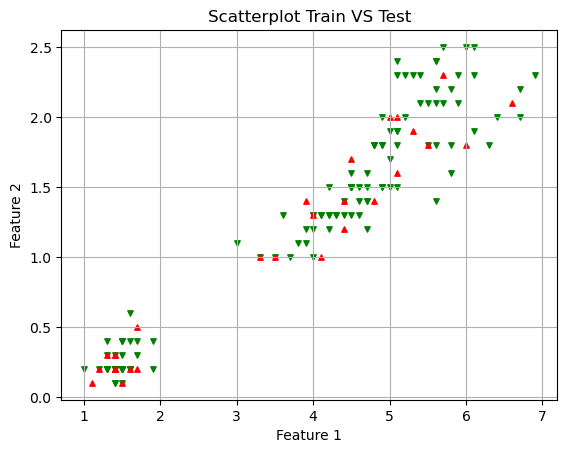

In [44]:
plt.scatter(inputs_train[:,0],inputs_train[:,1], c = 'Green', marker = "v", s=15)
plt.scatter(inputs_test[:,0],inputs_test[:,1], c = 'Red', marker = "^", s=15)
plt.grid()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatterplot Train VS Test")


- Ahora crea una malla de puntos de todo ese dominio y clasifica los puntos con los distintos modelos
- Crea un scatterplot en el que dibujes la malla de puntos y los puntos de entrenamiento encima, para comprobar como divide el espacio cada algoritmo y comparalos


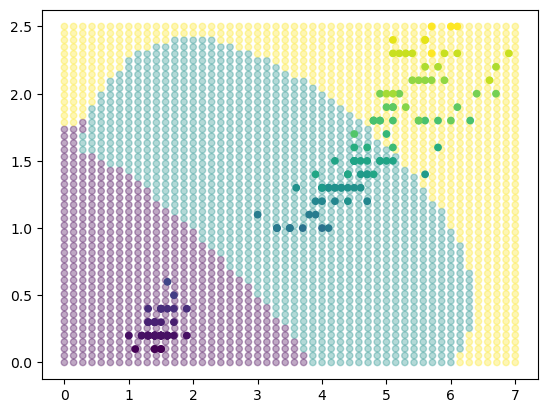

In [55]:
c = 50
t = 21

x = np.linspace(0, 7, c)
y = np.linspace(0, 2.5, c)

malla = []
for i in x:
    for j in y:
        malla.append([i, j])

malla = np.array(malla)
predict_malla = clf.predict(malla)
colores =np.array(['blue','red','green'])

plt.scatter(malla[:, 0], malla[:, 1], c = predict_malla, alpha = 0.34,s=t)
plt.scatter(inputs_train[:,0],inputs_train[:,1], c = inputs_train[:,1],s=t)
plt.scatter(inputs_test[:,0],inputs_test[:,1], c = inputs_test[:,1],  s=t)


- Extra: utiliza el metodo predict_proba para hacer un scatterplot mas sofisticado

### Reto 2.2

Repite el ejercicio anterior con otro dataset que tenga muchas mas features, y haz los scatterplots finales. ¿Que ocurre?